In [13]:
import pandas as pd
import numpy as np
import datasets
from inference_utils import *
import json
import os
import sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)
import utils
from utils import  get_stats

### read jsonl file

model_outputs = []
parent_dir = 'evalute_outputs/adapters/actionability/'
data_path =   parent_dir + 'predictions.jsonl'
aspect = 'actionability'


with open(data_path) as f:
    for line in f:
        model_outputs.append(json.loads(line))
        

# raw_predcitons = [str(i['generated_text']) for i in raw_predcitons]
# model_outputs = extract_predictions(raw_predcitons)





In [14]:
data = datasets.load_dataset('boda/review_evaluation_automatic_labels', aspect)['test']

gold_data = get_gold_labels(data, aspect,'chatgpt_ASPECT_score')

In [15]:
assert len(model_outputs) == len(gold_data)

In [16]:
gold_data[0]

{'actionability': 1}

In [17]:
aspects = [ 'actionability', 'grounding_specificity','verifiability', 'helpfulness'] if aspect == 'all' else [aspect]
## convert the list of dictionaries to dictionary of lists


predctions = {aspect:[] for aspect in aspects}
labels = {aspect:[] for aspect in aspects}

for i in range(len(model_outputs)):
    for aspect in aspects:

        l = gold_data[i][aspect]
        p = model_outputs[i][f'{aspect}_label']
        l = str(l)
        p = str(p)
        predctions[aspect].append(p)
        labels[aspect].append(l)

In [19]:
## write the stats into file
with open(f'{parent_dir}evalute_outputs.txt', 'w') as f:
    for aspect in aspects:
        stat_dict = get_stats(predctions[aspect], labels[aspect], aspect)
        f.write('*' * 20 + f'{aspect}'+ '*' * 20 + '\n')

        for k,v in stat_dict.items():
            ## round the values
            if isinstance(v, float):
                v = round(v, 3)
            f.write(f'{k}: {v}\n')
        f.write('-'*50+'\n')



In [20]:
data = datasets.load_dataset('boda/review_evaluation_automatic_labels', 'all')




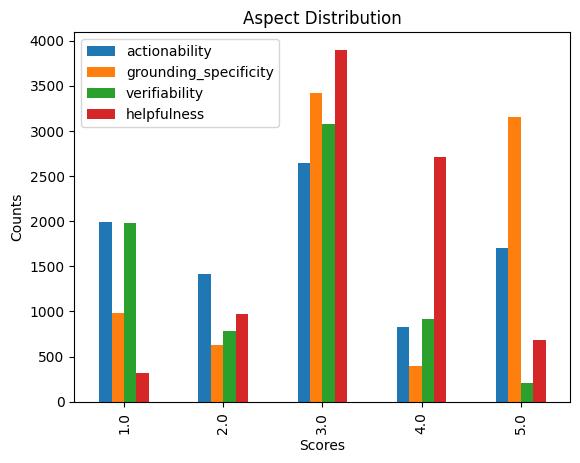

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert score values to numeric before computing value counts
value_counts = pd.DataFrame({
    aspect: pd.to_numeric(data['train'].to_pandas()[f'chatgpt_{aspect}_score'], errors='coerce').value_counts()
    for aspect in aspects
})

# Sort index to ensure correct order
value_counts = value_counts.sort_index()

# Plot the combined value counts
value_counts.plot(kind='bar', title='Aspect Distribution')
plt.xlabel('Scores')
plt.ylabel('Counts')
plt.show()
